## Informe Final de Carrera

Para el informe final de la carrera de ciencia de datos, se plantea la posibilidad de procesar los datos de una manera distinta a como se hizo en el SPRINT 02. Se ha pensado en una manera alternativa que incluye:

  - [x] Detección y "comprensión" de Outliers (en vez de la eliminación aplicada en el SPRINT 02)
  - [x] Aplicación del algoritmo de modelado con mejor desempeño del SPRINT 02 y comparar sus resultados con los obtenidos previamente, con énfasis en el entendimiento de los datos obtenido del Análisis Exploratorio de los Datos.
  - [x] Analizar la explicabilidad del modelo para poder ser discutido con personas no especialistas del aprendizaje automático.

__Posibles preguntas a responder:__

 - ¿Cómo afectan los outliers eliminados en el SPRINT 02, al mismo modelo sin eliminar dichos valores atípicos?
 - ¿Cómo afecta la selección de features al performance del modelo?
 - ¿Cómo se podría explicar el trabajo subyacente que hace el modelo para predecir el precio de una nueva publicación?
 
__Ubicación de notebooks de SPRINT 01 y SPRINT 02 en repositorio GitHub:__
 
 - ## Link: https://github.com/rafaguilarp/first_project.git

### Transformaciones de datos realizadas al dataset durante el SPRINT 01:

Durante el desarrollo del SPRINT 01 le fueron aplicados filtros al set de datos según lo requerido en la consigna del SPRINT 01. El set de datos fue delimitado a:

  1. Propiedades ubicadas en: Capital Federal.
  2. Tipo de propiedad: Departamento, Casa y PH.
  3. Superficie total: mayores a 15 y hasta 1000 metros cuadrados.
  4. Precio: menor a 4.000.000 de dólares.
  5. Variables a usar en el modelo: `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`

Para el informe final de carrera se realizará la misma delimitación que en los items 1,2,3 y 4 de la lista anterior, con la diferencia que se añadirá la columna property_type (tipo de propiedad) al set de datos, con la intención de usarla como variable independiente categórica.

### Metodología:

Se plantea realizar el filtrado o delimitación del dataset arriba descrito para entonces realizar las transformaciones establecidas en el SPRINT 02.

  - Detección y tratamiento de valores faltantes: los valores faltantes detectados fueron eliminados directamente.
  - Detección y comprensión de outliers: los valores atípicos serán explorados para conocer su origen y validar que son parte real del set de datos, y como tal deben conservarse para determinar su influencia en el desempeño del modelo.

## Carga de las librerias requeridas





In [1]:
# Para iniciar la exploración de datos se importan las librerías requeridas para tener acceso a las funciones que permitan el procedimiento
# IMPORTANDO LIBRERÍAS

#Analisis de Datos
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np

#Desactivacion de warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
from warnings import simplefilter
simplefilter(action= "ignore", category= FutureWarning )

#Representacion gráfica
import matplotlib.pyplot as plt
import seaborn as sns
import random as rnd
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

#!pip install ipython-autotime
#pip install yellowbrick
#pip install xgboost

%load_ext autotime

time: 0 ns (started: 2021-08-11 07:55:55 -03:00)


In [2]:
# CARGANDO SET DE DATOS USANDO PANDAS

datos_proper_SPR02 = pd.read_csv ("DS_Proyecto_01_Datos_Properati.csv")
print("El set de datos fue cargado satisfactoriamente.")

El set de datos fue cargado satisfactoriamente.
time: 2.98 s (started: 2021-08-11 07:55:55 -03:00)


### Preparación del set de datos: 

Se realiza el filtrado del set de datos segun la consigna SPRINT 01 y que también fue aplicada en el SPRINT 02. 

In [3]:
# Filtrado 0: Selecciona aquellas propiedades en Capital Federal.
datos_proper_SPR02_f0 = datos_proper_SPR02[datos_proper_SPR02["l2"]== "Capital Federal"]

# Filtrado 1: por los 3 tipos de propiedad más abundantes: "Departamento", "Casa" y "PH"
datos_proper_SPR02_f1 = datos_proper_SPR02_f0[(datos_proper_SPR02_f0["property_type"] == "Departamento") | (datos_proper_SPR02_f0["property_type"] == "Casa") | (datos_proper_SPR02_f0["property_type"] == "PH")]

# Filtrado 2: Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
datos_proper_SPR02_f2= datos_proper_SPR02_f1[(datos_proper_SPR02_f1["surface_total"] < 1000) & (datos_proper_SPR02_f1["surface_total"] > 15)]

#Filtrado 3: Selecciona aquellas propiedades cuya precio es menor 4.000.000 dólares.
datos_proper_SPR02_f3= datos_proper_SPR02_f2[(datos_proper_SPR02_f2["price"] < 4000000)]

#Filtrado 4: Seleccionamos las columnas 'l3',`rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, 'property_type' y `price`, 'title',
datos_proper_SPR02_f4= datos_proper_SPR02_f3.drop(['start_date', 'end_date', "lat", "lon",'created_on', 'l1', 'l2', 
       'currency', 'description', 
       'operation_type'], axis=1)

datos_proper_SPR02_f4.head() #Verificamos que preservemos las columnas deseadas en el dataset

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,property_type
0,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,"***Venta semipiso centro, ideal hostel*****",Departamento
1,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,Espectacular PH reciclado en Boedo sin expensas.,PH
2,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,Depto.tipo casa de 2 ambientes en Venta en Pal...,PH
3,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,PH
5,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,Depto.tipo casa de 2 ambientes en Venta en Vil...,PH


time: 360 ms (started: 2021-08-11 07:55:58 -03:00)


__Tabla 1.-__ mostrando resultados del proceso de preparación y filtrado de los registros que serán objeto de estudio en este trabajo. Básicamente se eligieron las muestras dentro del alcance establecido en la consigna del SPRINT 01.

___
___

# **1. Análisis Exploratorio de Datos**

En este ejercicio se hará énfasis en la exploración de los datos como aproximación clave para afinar la estrategia de modelado y sobretodo para orientar el ejercicio a un entorno real.  

## 1.a.- Estadísticas básicas por tipo de variable

In [4]:
# Realizamos la descripción estadística básica de las variables cuantitativas
datos_proper_SPR02_f4.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,82347.000000,82347.000000,81467.000000,82347.000000,81830.000000,8.234700e+04
mean,3.006497,2.000146,1.552886,95.162192,84.775877,2.622480e+05
std,1.307623,1.050772,0.850979,76.934055,155.399937,2.939044e+05
min,1.000000,0.000000,1.000000,16.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.250000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.798000e+05
75%,4.000000,3.000000,2.000000,110.000000,96.000000,2.800000e+05
max,26.000000,15.000000,14.000000,995.000000,17220.000000,3.900000e+06


time: 63 ms (started: 2021-08-11 07:55:58 -03:00)


__Tabla 2.-__ mostrando los resultados de consultar las estadísticas básicas de las variables cuantitativas contenidas en el set de datos.

In [5]:
# Realizamos la descripción estadística básica correspondiente a las variables cualitativas
datos_proper_SPR02_f4.describe(include='object')

,l3,title,property_type
count,82347,82347,82347
unique,57,37107,3
top,Palermo,DEPARTAMENTO EN VENTA,Departamento
freq,12378,3349,70409


time: 78 ms (started: 2021-08-11 07:55:58 -03:00)


__Tabla 3.-__ mostrando los resultados de consultar las estadísticas básicas de las variables cualitativas contenidas en el set de datos.

__Análisis:__ tras consultar expresamente las estadísticas básicas del set de datos podemos comenzar a percibir ciertas condiciones de completitud y variabilidad de los datos.

__Variables Cuantitativas:__ las diferencias en el conteo de registros entre las distintas columnas, indica la existencia de valores faltantes. Existen variaciones importantes de precios. Las diferecias en las estadísticas de las superficies sugieren realizar una investigación más profunda de dichas variables.

__Variables Cualitativas:__ muestra el tipo de propiedad más publicada y el barrio donde más se publican propiedades.  

## 1.b.- Detección e imputación de valores faltantes:

In [6]:
# Contamos la cantidad de valores faltantes por cada variable
datos_proper_SPR02_f4.isnull().sum()

l3                   0
rooms                0
bedrooms             0
bathrooms          880
surface_total        0
surface_covered    517
price                0
title                0
property_type        0
dtype: int64

time: 15 ms (started: 2021-08-11 07:55:58 -03:00)


In [7]:
# Verificamos el % de datos faltantes por columna
datos_proper_SPR02_f4.isnull().sum().sort_values(ascending=False)/len(datos_proper_SPR02_f4)*100

bathrooms          1.068649
surface_covered    0.627831
property_type      0.000000
title              0.000000
price              0.000000
surface_total      0.000000
bedrooms           0.000000
rooms              0.000000
l3                 0.000000
dtype: float64

time: 31 ms (started: 2021-08-11 07:55:58 -03:00)


__Análisis:__ se analizó la existencia de valores faltantes, de donde se encontraron 2 variables cuantitativas con tan solo 1,06% y 0,62% de valores faltantes.

In [8]:
# Realizamos la imputación de los valores faltantes
datos_proper_SPR02_f4_IMP= datos_proper_SPR02_f4.copy()
datos_proper_SPR02_f4_IMP['bathrooms'].fillna(datos_proper_SPR02_f4_IMP['bathrooms'].mode()[0], inplace = True) # Imputación de valores por la moda de la variable cualitativa numérica
datos_proper_SPR02_f4_IMP['surface_covered'].fillna(datos_proper_SPR02_f4_IMP['surface_covered'].mode()[0], inplace = True) # Imputación de valores por la moda de la variable cualitativa numérica
datos_proper_SPR02_f4_IMP.isnull().sum()

l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
title              0
property_type      0
dtype: int64

time: 31 ms (started: 2021-08-11 07:55:58 -03:00)


__Análisis:__ se realizó la imputación de los valores faltantes con el valor de la moda (valor que más se repite) de cada variable.

### 1.c.- Análisis del proceso de imputación de valores faltantes

In [9]:
# Verificamos el impacto de la imputación en la tendencia central de la variable
print("Media de bathrooms PRE imputación", ("{:.3f}".format(datos_proper_SPR02_f4["bathrooms"].mean())))
print("Media de bathrooms POST imputación", ("{:.3f}".format(datos_proper_SPR02_f4_IMP["bathrooms"].mean())))

Media de bathrooms PRE imputación 1.553
Media de bathrooms POST imputación 1.547
time: 0 ns (started: 2021-08-11 07:55:58 -03:00)


In [10]:
# Verificamos el impacto de la imputación en la tendencia central de la variable
print("Media de bathrooms PRE imputación", ("{:.3f}".format(datos_proper_SPR02_f4["surface_covered"].mean())))
print("Media de bathrooms POST imputación", ("{:.3f}".format(datos_proper_SPR02_f4_IMP["surface_covered"].mean())))

Media de bathrooms PRE imputación 84.776
Media de bathrooms POST imputación 84.495
time: 16 ms (started: 2021-08-11 07:55:58 -03:00)


__Análisis:__ se analizó el impacto del porceso de imputación de variables, en la tendencia central de cada variable. Se comparó la media de cada variable antes de la imputación, con la media posterior al proceso de imputación.
___

In [11]:
print("Tamaño del set de datos resultante", datos_proper_SPR02_f4_IMP.shape)

Tamaño del set de datos resultante (82347, 9)
time: 0 ns (started: 2021-08-11 07:55:58 -03:00)


In [12]:
datos_proper_SPR02_f4_IMP["l3"].unique()

array(['San Cristobal', 'Boedo', 'Palermo', 'Villa Crespo',
       'Parque Patricios', 'Villa Pueyrredón', 'Abasto', 'Flores',
       'Nuñez', 'Almagro', 'Belgrano', 'Floresta', 'Recoleta',
       'Balvanera', 'Caballito', 'Chacarita', 'San Telmo', 'Colegiales',
       'Villa Luro', 'Barrio Norte', 'Las Cañitas', 'San Nicolás',
       'Villa Urquiza', 'Parque Centenario', 'Villa General Mitre',
       'Boca', 'Once', 'Retiro', 'Monserrat', 'Puerto Madero',
       'Villa Ortuzar', 'Parque Chacabuco', 'Centro / Microcentro',
       'Liniers', 'Coghlan', 'Congreso', 'Paternal', 'Saavedra',
       'Villa Santa Rita', 'Barracas', 'Villa Lugano', 'Constitución',
       'Mataderos', 'Villa Devoto', 'Parque Avellaneda', 'Monte Castro',
       'Pompeya', 'Villa del Parque', 'Agronomía', 'Tribunales',
       'Velez Sarsfield', 'Parque Chas', 'Villa Real', 'Versalles',
       'Villa Riachuelo', 'Villa Soldati', 'Catalinas'], dtype=object)

time: 15 ms (started: 2021-08-11 07:55:58 -03:00)


## 1.d.- Detección y Tratamiento de Outliers: Detección

In [13]:
# Verificamos la proporción de cantidades de tipos de propiedad en el dataset filtrado
datos_proper_SPR02_f4_IMP["property_type"].value_counts()

Departamento    70409
PH               9703
Casa             2235
Name: property_type, dtype: int64

time: 16 ms (started: 2021-08-11 07:55:58 -03:00)


__Análisis:__ se consulta la cantidad de propiedades por tipo para conocer su proporción.
- Departamento: 70409
- PH: 1 por cada 7.25 apartamentos
- Casa: 1 por cada 31.50 apartamentos y 4.34 PH 

In [14]:
# Verificamos la proporción de publicaciones por barrio
datos_proper_SPR02_f4_IMP["l3"].value_counts()

Palermo                 12378
Almagro                  6854
Belgrano                 6061
Villa Crespo             6000
Caballito                5784
Recoleta                 5539
Barrio Norte             3131
Villa Urquiza            2977
Balvanera                2438
Flores                   2170
Nuñez                    1848
Puerto Madero            1727
Colegiales               1314
Villa Devoto             1280
Parque Centenario        1274
Villa del Parque         1255
Paternal                  982
San Cristobal             963
Saavedra                  962
San Telmo                 957
Floresta                  844
Retiro                    782
Boedo                     758
Once                      750
Monserrat                 748
San Nicolás               724
Parque Chacabuco          713
Las Cañitas               700
Barracas                  690
Liniers                   678
Villa Pueyrredón          674
Chacarita                 654
Congreso                  616
Monte Cast

time: 31 ms (started: 2021-08-11 07:55:58 -03:00)


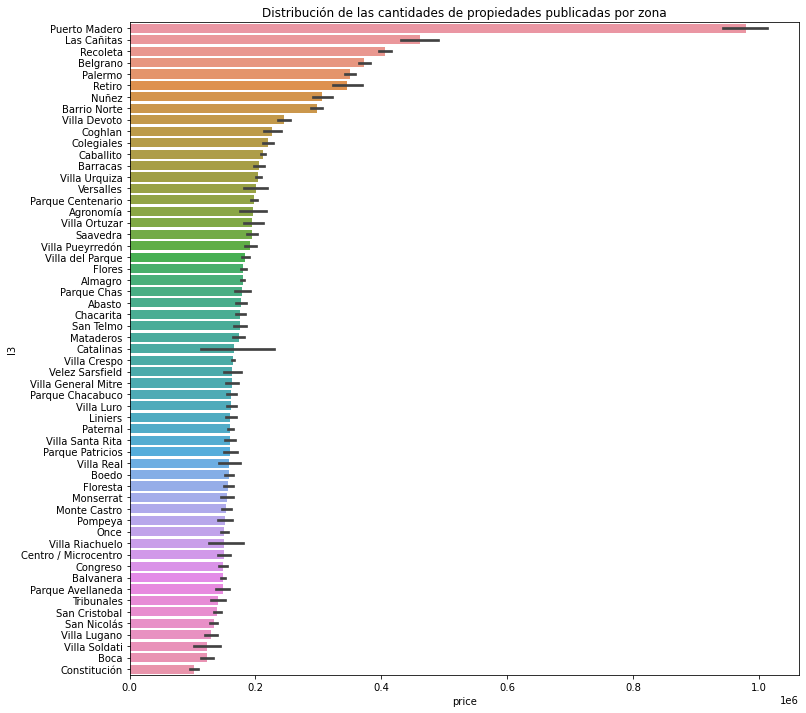

time: 4.94 s (started: 2021-08-11 07:55:58 -03:00)


In [15]:
# Consultamos la distribución de los precios de las propiedades según la zona donde se encuentran

plt.figure(figsize=(12,12))
order1 = datos_proper_SPR02_f4_IMP.groupby(['l3']).mean().sort_values('price', ascending = False).index.values
plt.title('Distribución de las cantidades de propiedades publicadas por zona')
sns.barplot(y=datos_proper_SPR02_f4_IMP['l3'], x= datos_proper_SPR02_f4_IMP['price'] , order=order1, log=False)
plt.show()

__Gráfica 1.__ Desplegamos gráficamente la distribución de las propiedades según el barrio (variable l3) donde éstas se encuentran ubicadas. Este gráfico de barras da la primera aproximación a un análisis que involucra 2 variables, el barrio (ubicación) con la variable objetivo precio. Desde acá se obtiene la primera idea de los barrios con propiedades con precios más altos.

<AxesSubplot:xlabel='property_type', ylabel='price'>

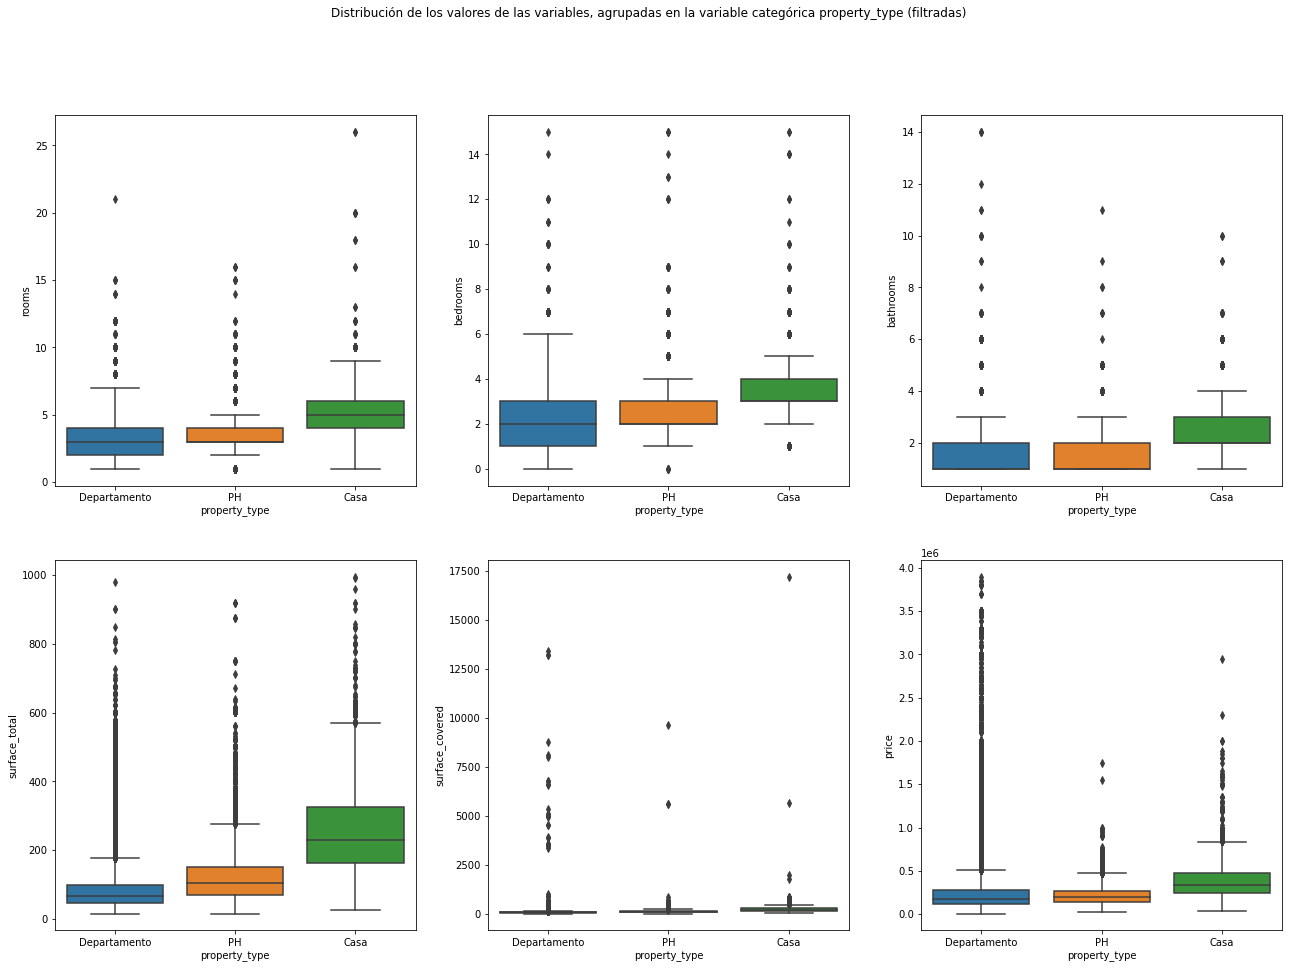

time: 1.48 s (started: 2021-08-11 07:56:03 -03:00)


In [16]:
# Vizualizando la distribucion de los valores de la variable categórica: tipos de propiedad
fig, axes = plt.subplots(2, 3, figsize=(22, 15))

fig.suptitle('Distribución de los valores de las variables, agrupadas en la variable categórica property_type (filtradas)')

sns.boxplot(ax=axes[0, 0], data= datos_proper_SPR02_f4_IMP, x='property_type' , y='rooms')
sns.boxplot(ax=axes[0, 1], data= datos_proper_SPR02_f4_IMP, x='property_type' , y='bedrooms')
sns.boxplot(ax=axes[0, 2], data= datos_proper_SPR02_f4_IMP, x='property_type' , y='bathrooms', )
sns.boxplot(ax=axes[1, 0], data= datos_proper_SPR02_f4_IMP, x='property_type' , y='surface_total')
sns.boxplot(ax=axes[1, 1], data= datos_proper_SPR02_f4_IMP, x='property_type' , y='surface_covered')
sns.boxplot(ax=axes[1, 2], data= datos_proper_SPR02_f4_IMP, x='property_type' , y='price')

__Gráfica 2.__ se analizan los gráficos de caja percibiendo que todas las variables cuantitativas poseen valores atípicos de elevada magnitud en su mayoría. La variable dependiente precio, posee una cantidad importante de valores atípicos, especialmente en el tipo de propiedad departamento. 

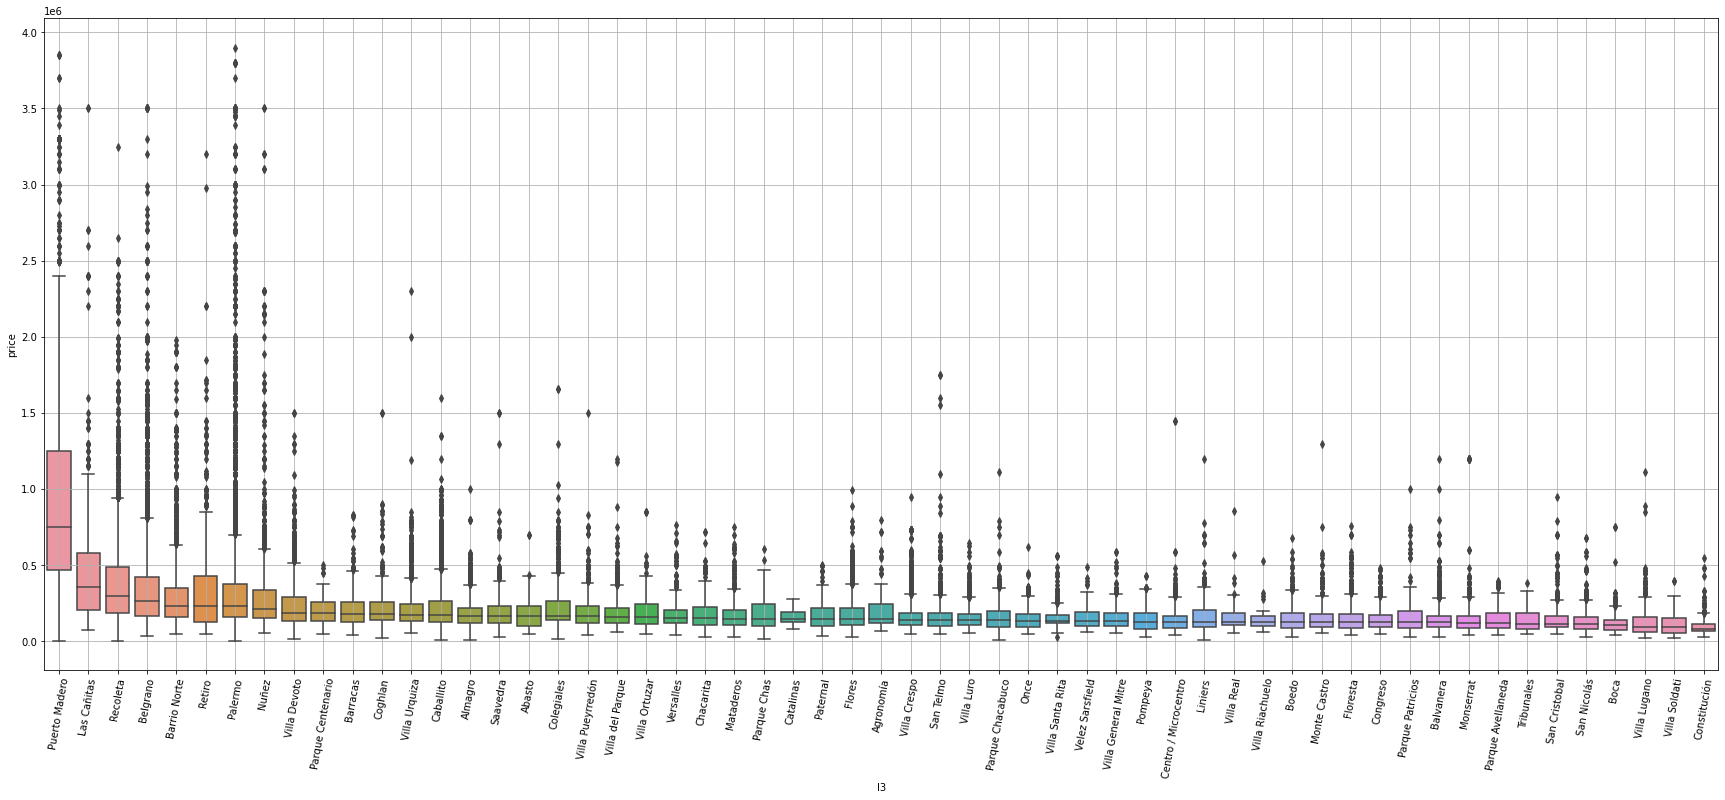

time: 2.58 s (started: 2021-08-11 07:56:05 -03:00)


In [17]:
# Visualizando la distribucion de los valores de la variable categórica: tipos de propiedad
plt.figure(figsize=(30,12))
fig.suptitle('Distribución de el precio de las propiedades (filtradas)')

grouped = datos_proper_SPR02_f4_IMP.loc[:,['l3', 'price']] \
    .groupby(['l3']) \
    .median() \
    .sort_values(by='price', ascending= False)

ax= sns.boxplot( data= datos_proper_SPR02_f4_IMP, x='l3' , y='price', order=grouped.index)
#ax.set_yscale('log')
#plt.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
plt.setp(ax.get_xticklabels(), rotation=80)
plt.grid()
plt.show()

__Gráfica 3.__ Al agrupar las propiedades segun la columna l3 (ordenados por la mediana en descendiente) y analizar su distribución de atípicos, se revela claramente que existe una condición de existencia de outliers común a cada barrio. Esto puede estar asociado a que en cada barrio hay 3 tipos de propiedades diferentes agrupadas. Al ordenar la categoría en base a la mediana del precio, se observa que los barrios cuyos precios de propiedades son notablemente más altos, muestran mayor cantidad y dispersión de registros de propiedades con precios atípicamente más altos respecto a la mayoría de propiedades en el mismo barrio.  

Los barrios de la siguiente lista:

*  Puerto Madero
*  Las Cañitas
*  Recoleta
*  Belgrano
*  Barrio Norte
*  Palermo
*  Nuñez
*  Villa Devoto

Muestran una alta densidad de valores por arriba del extremo del bigote superior, esto indica que existen muchas propiedades con precios muy por encima del grupo estadístico típico para cada barrio. Se realizará un drill down en el tipo de propiedades para conocer la distribución de precios con ese nivel de granularidad y entender mejor el fenómeno de outliers.
___

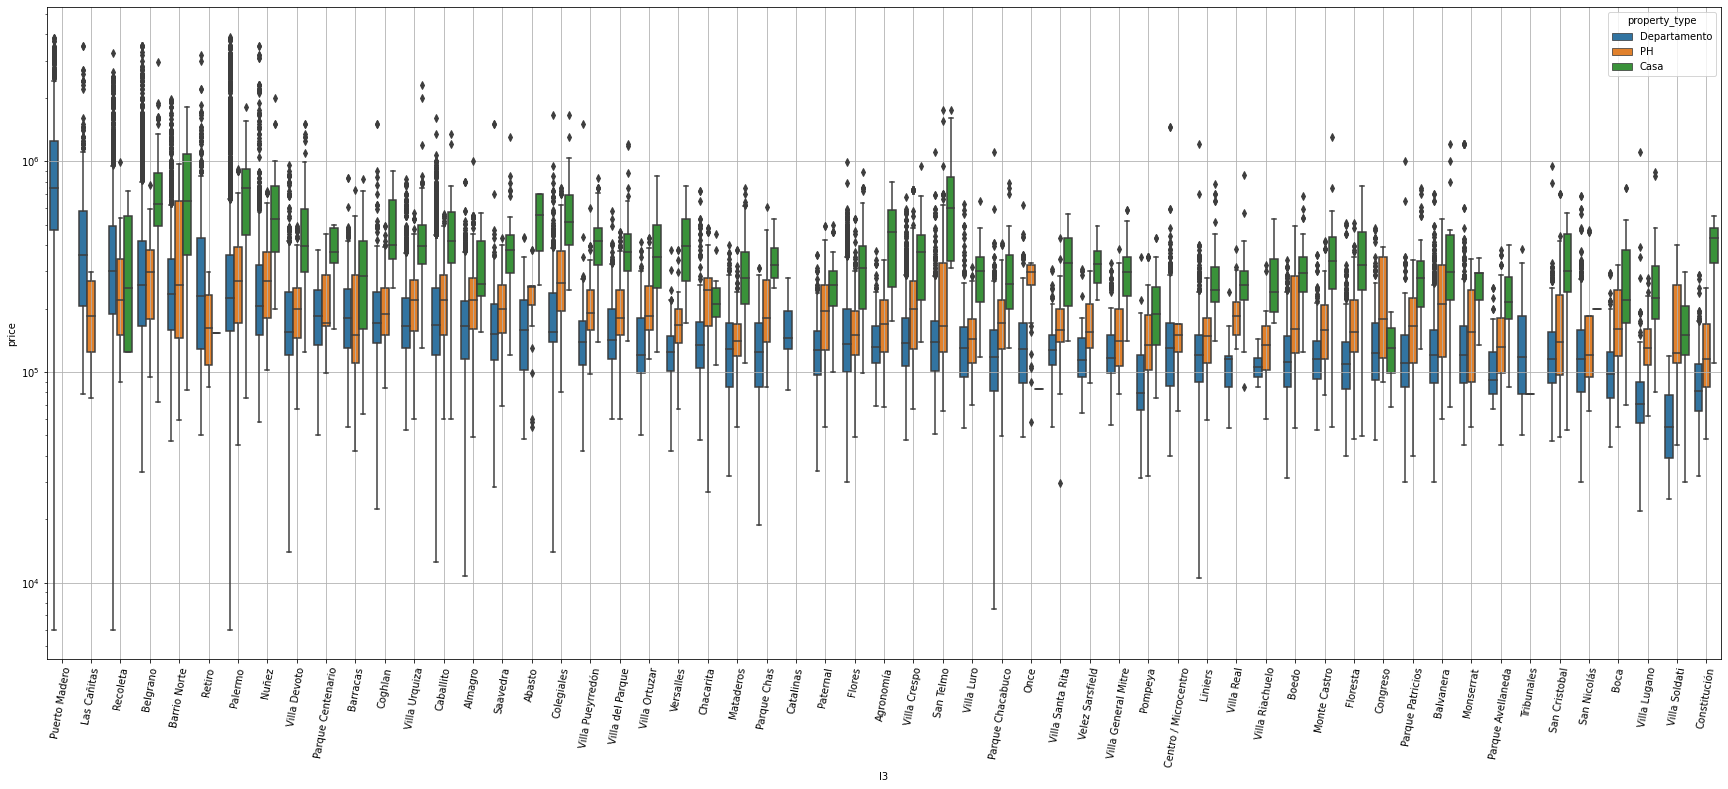

time: 8.05 s (started: 2021-08-11 07:56:08 -03:00)


In [18]:
# Visualizando la distribucion de los valores de la variable categórica: tipos de propiedad
plt.figure(figsize=(30,12))
fig.suptitle('Distribución del precio de las propiedades, agrupadas en la variable categórica property_type (filtradas)')

grouped = datos_proper_SPR02_f4_IMP.loc[:,['l3', 'price']] \
    .groupby(['l3']) \
    .median() \
    .sort_values(by='price', ascending= False)

ax= sns.boxplot( data= datos_proper_SPR02_f4_IMP, x='l3' , y='price', hue="property_type", order=grouped.index)
ax.set_yscale('log')
plt.setp(ax.get_xticklabels(), rotation=80)
plt.grid()
plt.show()


__Gráfica 4.__ Al hacer un "drill down" al mismo gráfico de cajas anterior, logramos "discriminar" con colores los tipos de propiedades en cada barrio, pudiendo revelar una interesante diferencia en la mediana de los precios de las casas (color rojo) en comparación con los otros dos tipos de propiedades (departamento y PH). Esta diferencia que se mantiene lateralmente, le confiere a la variable "property_type" una posible  capacidad predictora importante del precio, ya que su condición de variable categórica ayudaría ha hacer una previa separación del tipo de propiedad casas, lo que es favorable al algoritmo. Esta observación se tomará en cuenta durante el modelado.

Si bien el tipo de propiedad Casa es la menos frecuente, se logra percibir que este tipo de propiedad se vuelve más frecuente a medida que nos desplazamos a los barrios cuyos precios en general son menores y donde la propiedad Departamento es la menos frecuente.

Los barriosAbasto y Once muestran precios atipicamente bajos de algunos registros de propiedades del tipo PH.

Los barrios Puerto Madero y Las Cañitas no poseen propiedades de tipo casa entre sus publicaciones.

El barrio Puerto Madero sólo contiene registros del tipo de propiedad Departamento, los cuales posiblemente sean los más costosos de CABA.
___

In [19]:
# Verificamos el tipo de propiedad más publicada por barrio (propiedades más publicadas por barrio)
datos_proper_SPR02_f4_IMP.groupby('l3').apply(lambda subf: subf['property_type'][subf['surface_covered'].idxmax()])

l3
Abasto                          Casa
Agronomía                       Casa
Almagro                         Casa
Balvanera                       Casa
Barracas                        Casa
Barrio Norte            Departamento
Belgrano                Departamento
Boca                            Casa
Boedo                             PH
Caballito               Departamento
Catalinas               Departamento
Centro / Microcentro    Departamento
Chacarita                       Casa
Coghlan                         Casa
Colegiales              Departamento
Congreso                Departamento
Constitución                    Casa
Flores                  Departamento
Floresta                Departamento
Las Cañitas             Departamento
Liniers                 Departamento
Mataderos                       Casa
Monserrat                       Casa
Monte Castro            Departamento
Nuñez                           Casa
Once                    Departamento
Palermo                 Departament

time: 125 ms (started: 2021-08-11 07:56:16 -03:00)


___

### 1.e.- Análisis y comprensión de outliers:

In [20]:
# Analisis de outliers de la columna rooms
df_rooms_outliers= datos_proper_SPR02_f4_IMP.loc[lambda df: df['rooms'] > 15, :]
df_rooms_outliers.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,19.214286,11.928571,4.642857,434.785714,445.071429,522357.142857
std,3.423416,4.178043,1.736803,216.776091,209.943752,197451.301549
min,16.000000,1.000000,1.000000,53.000000,45.000000,135000.000000
25%,16.000000,9.250000,4.000000,295.000000,297.000000,460000.000000
50%,19.000000,14.000000,4.000000,443.000000,466.000000,500000.000000
75%,20.000000,15.000000,6.000000,476.000000,467.000000,699500.000000
max,26.000000,15.000000,7.000000,845.000000,835.000000,760000.000000


time: 32 ms (started: 2021-08-11 07:56:16 -03:00)


__Tabla 4.-__ mostrando las estadísticas básicas del subdataset obtenido de filtrar los registros de propiedades con más de 15 ambientes (rooms).

In [21]:
#  Analisis de outliers de la columna bedrooms
df_bedrooms_outliers= datos_proper_SPR02_f4_IMP.loc[lambda df: df['bedrooms'] > 6, :]
df_bedrooms_outliers

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,property_type
0,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,"***Venta semipiso centro, ideal hostel*****",Departamento
584,Palermo,8.0,7.0,5.0,240.0,240.0,575000.0,Depto.tipo casa de 8 ambientes en Venta en Pal...,PH
1587,Barrio Norte,8.0,7.0,5.0,601.0,400.0,650000.0,Depto.tipo casa de 8 ambientes en Venta en Bar...,PH
2938,Once,8.0,7.0,1.0,180.0,180.0,299000.0,Depto.tipo casa de 8 ambientes en Venta en Once,PH
2939,Barrio Norte,8.0,7.0,5.0,601.0,400.0,650000.0,Depto.tipo casa de 8 ambientes en Venta en Bar...,PH
...,...,...,...,...,...,...,...,...,...
141986,Villa Riachuelo,11.0,8.0,4.0,463.0,463.0,300000.0,Fructuoso Rivera 6200 V Riachuelo PH en block ...,PH
142040,Floresta,12.0,9.0,4.0,310.0,225.0,300000.0,Yerbal 3600 Floresta PH 12amb PB u$ 300.000,PH
142101,Villa Urquiza,8.0,7.0,3.0,451.0,249.0,530000.0,ESPECTACULAR PH EN VILLA URQUIZA VENTA OPORTUN...,PH
142106,San Telmo,15.0,12.0,7.0,540.0,250.0,690000.0,OPORTUNIDAD!!! VENTA EN BLOCK DE 2 PH EN SAN T...,PH


time: 16 ms (started: 2021-08-11 07:56:16 -03:00)


__Tabla 5.-__ mostrando el subdataset obtenido de filtrar los registros de propiedades con más de 6 dormitorios (bedrooms).

In [22]:
df_bedrooms_outliers.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,263.000000,263.000000,263.000000,263.000000,263.000000,2.630000e+02
mean,9.262357,8.022814,3.467681,315.334601,269.942966,4.521414e+05
std,3.025904,1.935864,2.063381,186.391308,147.405580,2.908578e+05
min,2.000000,7.000000,1.000000,47.000000,40.000000,1.000000e+05
25%,8.000000,7.000000,1.000000,180.000000,170.000000,2.525000e+05
50%,8.000000,7.000000,3.000000,240.000000,240.000000,3.950000e+05
75%,10.000000,8.000000,5.000000,405.000000,372.500000,5.750000e+05
max,26.000000,15.000000,10.000000,919.000000,835.000000,2.299000e+06


time: 16 ms (started: 2021-08-11 07:56:16 -03:00)


__Tabla 6.-__ mostrando las estadísticas básicas del subdataset obtenido de filtrar los registros de propiedades con más de 6 dormitorios (bedrooms).

In [23]:
#  Analisis de outliers de la columna bathrooms
df_bathrooms_outliers= datos_proper_SPR02_f4_IMP.loc[lambda df: df['bathrooms'] > 4, :]
df_bathrooms_outliers

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,property_type
310,Puerto Madero,4.0,3.0,5.0,250.0,250.0,3390000.0,Venta espectacular 4 ambientes en torre Alvear...,Departamento
325,Palermo,5.0,4.0,5.0,266.0,266.0,2200000.0,Torre Bellini - Palermo Chico - 4 amb con dep ...,Departamento
327,Palermo,5.0,4.0,5.0,266.0,266.0,2200000.0,5 amb con dep - 2 cocheras y baulera - Torre B...,Departamento
584,Palermo,8.0,7.0,5.0,240.0,240.0,575000.0,Depto.tipo casa de 8 ambientes en Venta en Pal...,PH
1109,Villa Devoto,6.0,3.0,5.0,720.0,460.0,1500000.0,Casa venta Devoto 6 amb. Jardín y 3 cocheras,Casa
...,...,...,...,...,...,...,...,...,...
146143,Palermo,8.0,3.0,6.0,301.0,239.0,900000.0,Excelente oportunidad de reciclaje en Barrio P...,Departamento
146145,Palermo,8.0,3.0,5.0,301.0,239.0,1290000.0,"Excelente Departamento de 301 m² con Terraza, ...",Departamento
146181,Palermo,4.0,3.0,5.0,220.0,210.0,1470000.0,TORRE DECO SEGUI ESPECTACULAR UNIDAD DE 4 AMB ...,Departamento
146532,Palermo,6.0,4.0,6.0,326.0,326.0,2740000.0,Torre Mirabilia Piso de 326 m2 - 4 Suites - 4 ...,Departamento


time: 15 ms (started: 2021-08-11 07:56:16 -03:00)


__Tabla 7.-__ mostrando las estadísticas básicas del subdataset obtenido de filtrar los registros de propiedades con más de 4 cuartos de baño (bathrooms).

In [24]:
#  Analisis de outliers de la columna bathrooms
df_price_outliers= datos_proper_SPR02_f4_IMP.loc[lambda df: df['price'] > 2490000, :]
df_price_outliers

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,property_type
310,Puerto Madero,4.0,3.0,5.0,250.0,250.0,3390000.0,Venta espectacular 4 ambientes en torre Alvear...,Departamento
1000,Palermo,4.0,3.0,3.0,387.0,270.0,2690000.0,Espectacular Piso en Venta en Palermo Chico c...,Departamento
1535,Palermo,4.0,3.0,3.0,220.0,220.0,3000000.0,Departamento en Venta ubicado en Palermo Chico...,Departamento
2773,Palermo,4.0,3.0,3.0,250.0,250.0,3500000.0,VENTA GRAND BOURG!!!! excelente semipiso USD 3...,Departamento
2862,Puerto Madero,4.0,3.0,5.0,576.0,438.0,3300000.0,U$S 3.300.000 - 4 amb en Duplex 576 mts2 - Ma...,Departamento
...,...,...,...,...,...,...,...,...,...
146137,Palermo,5.0,3.0,3.0,535.0,220.0,2800000.0,VENTA con RENTA hasta Feb 2020 TORRES DE GELL...,Departamento
146150,Palermo,4.0,3.0,3.0,250.0,250.0,3450000.0,VENTA GRAND BOURG!!!! excelente semipiso USD 3...,Departamento
146152,Palermo,4.0,3.0,3.0,250.0,250.0,3500000.0,VENTA GRAND BOURG!!!! excelente semipiso USD 3...,Departamento
146154,Palermo,4.0,3.0,3.0,250.0,250.0,3450000.0,Venta - Figueroa Alcorta Pte. Av. 3500,Departamento


time: 16 ms (started: 2021-08-11 07:56:16 -03:00)


__Tabla 8.-__ mostrando el subdataset obtenido de filtrar los registros de propiedades cuyo precio es mayor a 2.490.000 USD.

In [25]:
df_price_outliers.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,275.000000,275.000000,275.000000,275.000000,275.000000,2.750000e+02
mean,5.134545,3.560000,4.214545,417.196364,358.661818,3.019465e+06
std,1.340037,0.638657,1.175079,119.179179,89.041726,3.922082e+05
min,2.000000,1.000000,1.000000,54.000000,54.000000,2.499000e+06
25%,4.000000,3.000000,3.000000,334.000000,300.000000,2.600000e+06
50%,5.000000,4.000000,4.000000,406.000000,335.000000,3.000000e+06
75%,6.000000,4.000000,5.000000,540.000000,438.000000,3.300000e+06
max,9.000000,5.000000,8.000000,726.000000,700.000000,3.900000e+06


time: 16 ms (started: 2021-08-11 07:56:16 -03:00)


__Tabla 9.-__ mostrando las estadísticas básicas del subdataset obtenido de filtrar los registros de propiedades cuyo precio es mayor a 2.490.000 USD.

In [26]:
test=df_price_outliers[df_price_outliers['l3']== ("Palermo" and "Puerto Madero")]
test

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,property_type
310,Puerto Madero,4.0,3.0,5.0,250.0,250.0,3390000.0,Venta espectacular 4 ambientes en torre Alvear...,Departamento
2862,Puerto Madero,4.0,3.0,5.0,576.0,438.0,3300000.0,U$S 3.300.000 - 4 amb en Duplex 576 mts2 - Ma...,Departamento
2864,Puerto Madero,4.0,3.0,5.0,576.0,438.0,3300000.0,U$S 3.300.000 - 4 amb en Duplex 576 mts2 - Ma...,Departamento
2865,Puerto Madero,4.0,3.0,3.0,335.0,335.0,3100000.0,VENTA TORRE RENOIR II Máxima categoría Increib...,Departamento
11913,Puerto Madero,5.0,4.0,4.0,576.0,438.0,3300000.0,VENTA Madero Center VISTA DIQUE DUPLEX ALTO!!!...,Departamento
...,...,...,...,...,...,...,...,...,...
141761,Puerto Madero,5.0,4.0,6.0,426.0,426.0,2600000.0,Departamento con la mejor vista de Puerto Made...,Departamento
141842,Puerto Madero,5.0,4.0,4.0,540.0,438.0,3300000.0,MADERO CENTER EDIFICIO DIQUE DUPLEX 5 AMBIENTE...,Departamento
141843,Puerto Madero,5.0,4.0,4.0,576.0,438.0,3300000.0,VENTA Madero Center VISTA DIQUE DUPLEX ALTO!!!...,Departamento
141844,Puerto Madero,5.0,4.0,6.0,568.0,438.0,3200000.0,Madero Center La Mejor Manzana de Puerto Madero,Departamento


time: 16 ms (started: 2021-08-11 07:56:16 -03:00)


__Tabla 10.-__ mostrando el subdataset obtenido de filtrar los registros de propiedades cuyo precio es mayor a 2.490.000 USD y están ubicadas en los barrios Palermo y Puerto Madero.

In [27]:
df_price_outliers

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,property_type
310,Puerto Madero,4.0,3.0,5.0,250.0,250.0,3390000.0,Venta espectacular 4 ambientes en torre Alvear...,Departamento
1000,Palermo,4.0,3.0,3.0,387.0,270.0,2690000.0,Espectacular Piso en Venta en Palermo Chico c...,Departamento
1535,Palermo,4.0,3.0,3.0,220.0,220.0,3000000.0,Departamento en Venta ubicado en Palermo Chico...,Departamento
2773,Palermo,4.0,3.0,3.0,250.0,250.0,3500000.0,VENTA GRAND BOURG!!!! excelente semipiso USD 3...,Departamento
2862,Puerto Madero,4.0,3.0,5.0,576.0,438.0,3300000.0,U$S 3.300.000 - 4 amb en Duplex 576 mts2 - Ma...,Departamento
...,...,...,...,...,...,...,...,...,...
146137,Palermo,5.0,3.0,3.0,535.0,220.0,2800000.0,VENTA con RENTA hasta Feb 2020 TORRES DE GELL...,Departamento
146150,Palermo,4.0,3.0,3.0,250.0,250.0,3450000.0,VENTA GRAND BOURG!!!! excelente semipiso USD 3...,Departamento
146152,Palermo,4.0,3.0,3.0,250.0,250.0,3500000.0,VENTA GRAND BOURG!!!! excelente semipiso USD 3...,Departamento
146154,Palermo,4.0,3.0,3.0,250.0,250.0,3450000.0,Venta - Figueroa Alcorta Pte. Av. 3500,Departamento


time: 15 ms (started: 2021-08-11 07:56:16 -03:00)


__Tabla 11.-__ mostrando el subdataset obtenido de filtrar los registros de propiedades cuyo precio es mayor a 2.490.000 USD los cuales se consideran valores atípicos de precios.

Text(0, 0.5, 'Frecuecia')

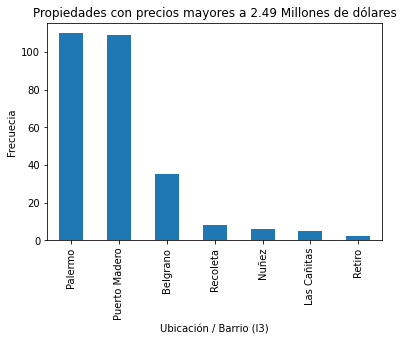

time: 234 ms (started: 2021-08-11 07:56:16 -03:00)


In [28]:
df_price_outliers.value_counts(df_price_outliers['l3']).plot.bar()
plt.title('Propiedades con precios mayores a 2.49 Millones de dólares')
plt.xlabel('Ubicación / Barrio (l3)')
plt.ylabel('Frecuecia')


__Gráfica 6:__ Este gráfico de barras muestra la alta concentración (>100) de propiedades de precios excepcionalmente altos en los barrios Puerto Madero y Palermo.
___

__Análisis y comprensión de outliers:__ en este apartado se realizó una exploración de los datos detallada, orientada a conocer un poco más sobre las razones que explican el origen de los precios atípicos de las propiedades que resaltan como outliers. Más allá de las justificaciones que pueden interpretarse de las columnas restantes en el dataframe (l3, rooms, bedrooms, bathrooms, surface_total, surface_covered, property_type). Llama la atención el alto precio y la cantidad de propiedades con esta condición, sin embargo estos registros con valores de precios atipicamente altos se asocian claramente con ciertos barrios.

Como apoyo, se conservó temporalmente la columna "title" que contiene información explicativa de características adicionales de las propiedades con precios excepcionalmente altos. Como resultado, se tiene un mejor entendimiento de los precios de estas propiedades debido a la exclusividad de la ubicacion y distribución de espacios, por ejemplo, apartamentos en torres de lujo, ubicaciones en avenidas importantes, propiedades tipo duplex entre otras caracyerísticas descritas en esta columna temporalmente agregada.
___
___

In [29]:
datos_proper_SPR02_f4_IMP

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,title,property_type
0,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,"***Venta semipiso centro, ideal hostel*****",Departamento
1,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,Espectacular PH reciclado en Boedo sin expensas.,PH
2,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,Depto.tipo casa de 2 ambientes en Venta en Pal...,PH
3,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,PH
5,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,Depto.tipo casa de 2 ambientes en Venta en Vil...,PH
...,...,...,...,...,...,...,...,...,...
146554,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,Soler 4900 - PH 4 Ambientes 100% Reciclado- Pa...,PH
146555,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,PH Reciclado a nuevo en pleno Palermo Hollywood!,PH
146556,Palermo,4.0,2.0,2.0,317.0,143.0,530000.0,Hermoso PH reciclado - 4 ambientes + Pileta + ...,PH
146557,Palermo,3.0,2.0,2.0,145.0,145.0,420000.0,Venta. Departamento. 3 Ambientes. 145m². Ampli...,Departamento


time: 0 ns (started: 2021-08-11 07:56:16 -03:00)


__Tabla 12.-__ para verificar el dataset que será el punto de partida para realizar los procesos inherentes al modelado.
___
___

## 2.- Codificación de variables categóricas: Encoding

In [30]:
#Se realiza la eliminación de la columna title usada para la comprensión de los outliers
datos_proper_SPR02_Encod= datos_proper_SPR02_f4_IMP.copy()
datos_proper_SPR02_Encod.drop('title', axis=1, inplace=True)
datos_proper_SPR02_Encod

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH
...,...,...,...,...,...,...,...,...
146554,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,PH
146555,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,PH
146556,Palermo,4.0,2.0,2.0,317.0,143.0,530000.0,PH
146557,Palermo,3.0,2.0,2.0,145.0,145.0,420000.0,Departamento


time: 46 ms (started: 2021-08-11 07:56:16 -03:00)


__Tabla 13.-__ mostrando el dataset resultante de haber excluido la columna "title" con la descripción de la propiedad, la cuel fue utilizada para soportar el proceso de comprensión de valores atípicos en los registros.

In [31]:
# Aplicamos el método get_dummies de Pandas para obtener variables binarias de cada categoría de las columnas 'l3' y 'property_type'
datos_proper_SPR02_Encod2 = pd.get_dummies(datos_proper_SPR02_Encod, columns=['l3','property_type'] )
#datos_proper_SPR02_Encod.drop(['l3','property_type'], axis=1)
datos_proper_SPR02_Encod2

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,l3_Abasto,l3_Agronomía,l3_Almagro,l3_Balvanera,...,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque,property_type_Casa,property_type_Departamento,property_type_PH
0,7.0,7.0,2.0,140.0,140.0,153000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2.0,1.0,2.0,70.0,58.0,159000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2.0,1.0,1.0,45.0,45.0,125000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2.0,1.0,1.0,85.0,50.0,295000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,2.0,1.0,1.0,56.0,56.0,150000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146554,4.0,3.0,3.0,175.0,111.0,570000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
146555,3.0,2.0,2.0,144.0,134.0,480000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
146556,4.0,2.0,2.0,317.0,143.0,530000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
146557,3.0,2.0,2.0,145.0,145.0,420000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


time: 79 ms (started: 2021-08-11 07:56:16 -03:00)


__Tabla 14.-__ mostrando el dataset resultante de la creación de variables "dummies" a partir de las columnas categóricas 'l3' y 'property_type' correspondientes a el barrio de ubicacion y tipo de propiedad.

In [49]:
datos_proper_SPR02_Encod2.columns

Index(['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'l3_Abasto', 'l3_Agronomía', 'l3_Almagro', 'l3_Balvanera',
       'l3_Barracas', 'l3_Barrio Norte', 'l3_Belgrano', 'l3_Boca', 'l3_Boedo',
       'l3_Caballito', 'l3_Catalinas', 'l3_Centro / Microcentro',
       'l3_Chacarita', 'l3_Coghlan', 'l3_Colegiales', 'l3_Congreso',
       'l3_Constitución', 'l3_Flores', 'l3_Floresta', 'l3_Las Cañitas',
       'l3_Liniers', 'l3_Mataderos', 'l3_Monserrat', 'l3_Monte Castro',
       'l3_Nuñez', 'l3_Once', 'l3_Palermo', 'l3_Parque Avellaneda',
       'l3_Parque Centenario', 'l3_Parque Chacabuco', 'l3_Parque Chas',
       'l3_Parque Patricios', 'l3_Paternal', 'l3_Pompeya', 'l3_Puerto Madero',
       'l3_Recoleta', 'l3_Retiro', 'l3_Saavedra', 'l3_San Cristobal',
       'l3_San Nicolás', 'l3_San Telmo', 'l3_Tribunales', 'l3_Velez Sarsfield',
       'l3_Versalles', 'l3_Villa Crespo', 'l3_Villa Devoto',
       'l3_Villa General Mitre', 'l3_Villa Lugano', 'l3_Vill

time: 94 ms (started: 2021-08-11 13:21:50 -03:00)


___
___

## 3.- Preprocesamiento para el modelado: Standard Scaler

Aplicamos el algoritmo StandardScaler( )

In [33]:
columns=(['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'l3_Abasto', 'l3_Agronomía', 'l3_Almagro', 'l3_Balvanera',
       'l3_Barracas', 'l3_Barrio Norte', 'l3_Belgrano', 'l3_Boca', 'l3_Boedo',
       'l3_Caballito', 'l3_Catalinas', 'l3_Centro / Microcentro',
       'l3_Chacarita', 'l3_Coghlan', 'l3_Colegiales', 'l3_Congreso',
       'l3_Constitución', 'l3_Flores', 'l3_Floresta', 'l3_Las Cañitas',
       'l3_Liniers', 'l3_Mataderos', 'l3_Monserrat', 'l3_Monte Castro',
       'l3_Nuñez', 'l3_Once', 'l3_Palermo', 'l3_Parque Avellaneda',
       'l3_Parque Centenario', 'l3_Parque Chacabuco', 'l3_Parque Chas',
       'l3_Parque Patricios', 'l3_Paternal', 'l3_Pompeya', 'l3_Puerto Madero',
       'l3_Recoleta', 'l3_Retiro', 'l3_Saavedra', 'l3_San Cristobal',
       'l3_San Nicolás', 'l3_San Telmo', 'l3_Tribunales', 'l3_Velez Sarsfield',
       'l3_Versalles', 'l3_Villa Crespo', 'l3_Villa Devoto',
       'l3_Villa General Mitre', 'l3_Villa Lugano', 'l3_Villa Luro',
       'l3_Villa Ortuzar', 'l3_Villa Pueyrredón', 'l3_Villa Real',
       'l3_Villa Riachuelo', 'l3_Villa Santa Rita', 'l3_Villa Soldati',
       'l3_Villa Urquiza', 'l3_Villa del Parque', 'property_type_Casa',
       'property_type_Departamento', 'property_type_PH'])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
datos_proper_for_Model= scaler.fit_transform(datos_proper_SPR02_Encod2)
datos_proper_for_Model = pd.DataFrame(datos_proper_for_Model, columns = columns)
datos_proper_for_Model

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,l3_Abasto,l3_Agronomía,l3_Almagro,l3_Balvanera,...,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque,property_type_Casa,property_type_Departamento,property_type_PH
0,3.054037,4.758297,0.534021,0.582812,0.358212,-0.371715,-0.070911,-0.043706,-0.301314,-0.17467,...,-0.090843,-0.039764,-0.021768,-0.061372,-0.028536,-0.193669,-0.124404,-0.167028,0.411767,-0.365471
1,-0.769720,-0.951826,0.534021,-0.327064,-0.170988,-0.351300,-0.070911,-0.043706,-0.301314,-0.17467,...,-0.090843,-0.039764,-0.021768,-0.061372,-0.028536,-0.193669,-0.124404,-0.167028,-2.428557,2.736194
2,-0.769720,-0.951826,-0.644777,-0.652019,-0.254886,-0.466985,-0.070911,-0.043706,-0.301314,-0.17467,...,-0.090843,-0.039764,-0.021768,-0.061372,-0.028536,-0.193669,-0.124404,-0.167028,-2.428557,2.736194
3,-0.769720,-0.951826,-0.644777,-0.132090,-0.222618,0.111438,-0.070911,-0.043706,-0.301314,-0.17467,...,-0.090843,-0.039764,-0.021768,-0.061372,-0.028536,-0.193669,-0.124404,-0.167028,-2.428557,2.736194
4,-0.769720,-0.951826,-0.644777,-0.509039,-0.183896,-0.381922,-0.070911,-0.043706,-0.301314,-0.17467,...,-0.090843,-0.039764,-0.021768,-0.061372,-0.028536,-0.193669,-0.124404,-0.167028,-2.428557,2.736194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82342,0.759783,0.951548,1.712819,1.037750,0.171056,1.047122,-0.070911,-0.043706,-0.301314,-0.17467,...,-0.090843,-0.039764,-0.021768,-0.061372,-0.028536,-0.193669,-0.124404,-0.167028,-2.428557,2.736194
82343,-0.004969,-0.000139,0.534021,0.634805,0.319490,0.740899,-0.070911,-0.043706,-0.301314,-0.17467,...,-0.090843,-0.039764,-0.021768,-0.061372,-0.028536,-0.193669,-0.124404,-0.167028,-2.428557,2.736194
82344,0.759783,-0.000139,0.534021,2.883497,0.377573,0.911023,-0.070911,-0.043706,-0.301314,-0.17467,...,-0.090843,-0.039764,-0.021768,-0.061372,-0.028536,-0.193669,-0.124404,-0.167028,-2.428557,2.736194
82345,-0.004969,-0.000139,0.534021,0.647803,0.390480,0.536749,-0.070911,-0.043706,-0.301314,-0.17467,...,-0.090843,-0.039764,-0.021768,-0.061372,-0.028536,-0.193669,-0.124404,-0.167028,0.411767,-0.365471


time: 532 ms (started: 2021-08-11 07:56:16 -03:00)


__Tabla 15.-__ mostrando el dataset resultante del escalado de los datos.

## Transformaciones de datos implementadas:

* [x] Imputación de valores faltantes
* [x] Detección y comprensión de Outliers
* [x] Encoding
* [X] Escalado de datos


Posterior al filtrado de los datos aplicado de manera similar que en el SPRINT 01, se realizó el tratamiento de los valores faltantes detectando e imputando los mismos. Se detectaron las columnas __'bathrooms' con 1.07%__ y __'surface_covered' con 0.63% de datos faltantes__. 

Para la columna 'bathrooms' siendo de tipo numérica entera, los valores faltantes fueron imputados usando la moda (valor que más se repite), y para la columna 'surface_covered' por contener datos de tipo numéricos float, le fueron imputados los valores faltantes con el valor de la media de los valores presentes.
___
___

## 4.- Partición de datos de entrenamiento y prueba

In [34]:
# Definición del target y variables independientes
X = datos_proper_SPR02_Encod2.drop(["price"], axis= 1) 
y = datos_proper_SPR02_Encod2.price

time: 16 ms (started: 2021-08-11 07:56:17 -03:00)


In [35]:
from sklearn.model_selection import train_test_split
# Train / test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

time: 234 ms (started: 2021-08-11 07:56:17 -03:00)


In [36]:
# Chequeando datos de X:
print('X_train', X_train.shape)
print('X_test', X_test.shape)

# Chequeando datos de y:
print('y_train', y_train.shape)
print('y_test', y_test.shape)


X_train (57642, 65)
X_test (24705, 65)
y_train (57642,)
y_test (24705,)
time: 0 ns (started: 2021-08-11 07:56:17 -03:00)


___
___

## __5.- Modelo de Aprendizaje Automático__

 __Objetivo:__ se entrenará el modelo con el mejor desempeño obtenido en el SPRINT 02, esta vez sin haber eliminado los outliers y sin ingeniería de features.



## Definición de modelo:

__- Modelo de ensamble XGBoost__ será entrenado con hiperparámetros definidos manualmente tras varios experimentos al tanteo.


In [37]:
#Importamos las librerias correspondientes
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression #Regresor de Linear Regression
from sklearn.neighbors import KNeighborsRegressor #Regresor de KNN
from sklearn.tree import DecisionTreeRegressor #Regresor de Decision Trees
from sklearn.model_selection import train_test_split #Train/Test split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score


time: 828 ms (started: 2021-08-11 07:56:17 -03:00)


In [38]:
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, KFold


time: 203 ms (started: 2021-08-11 07:56:18 -03:00)


## 5.a.- Modelo XGBoost


In [39]:
# Definimos el modelo XGBoost
modelo_XGB = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

time: 0 ns (started: 2021-08-11 07:56:18 -03:00)


In [40]:
modelo_XGB.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.100000001, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

time: 1min 14s (started: 2021-08-11 07:56:18 -03:00)


In [41]:
# Predicción
prediction_modelo_XGBl = modelo_XGB.predict(X_test)

time: 875 ms (started: 2021-08-11 07:57:33 -03:00)


In [42]:
# Mostramos los scores del desempeño del modelo
print('XGB Mean Absolute Error: ',("{:.3f}".format(mean_absolute_error(y_test, prediction_modelo_XGBl))))
print('XGB Mean Squared Error: ',("{:.3f}".format(mean_squared_error(y_test, prediction_modelo_XGBl))))
print('XGB Explained Variance Score: ',("{:.3f}".format(explained_variance_score(y_test, prediction_modelo_XGBl))))
print('XGB R2 Score:',("{:.3f}".format(r2_score(y_test, prediction_modelo_XGBl))))

XGB Mean Absolute Error:  36846.247
XGB Mean Squared Error:  7960363786.091
XGB Explained Variance Score:  0.903
XGB R2 Score: 0.903
time: 344 ms (started: 2021-08-11 07:57:34 -03:00)


___
___

## 6.- Explicabilidad del modelo

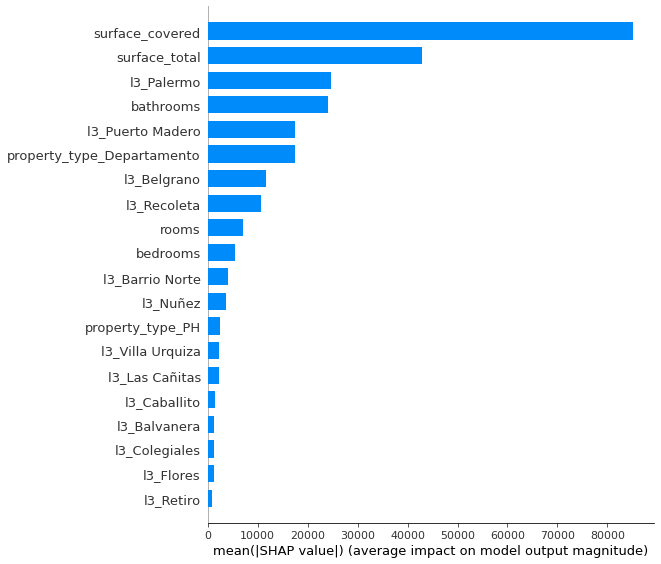

time: 6min 13s (started: 2021-08-11 07:57:34 -03:00)


In [43]:
import shap
shap_values = shap.TreeExplainer(modelo_XGB).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

__Gráfica 7:__

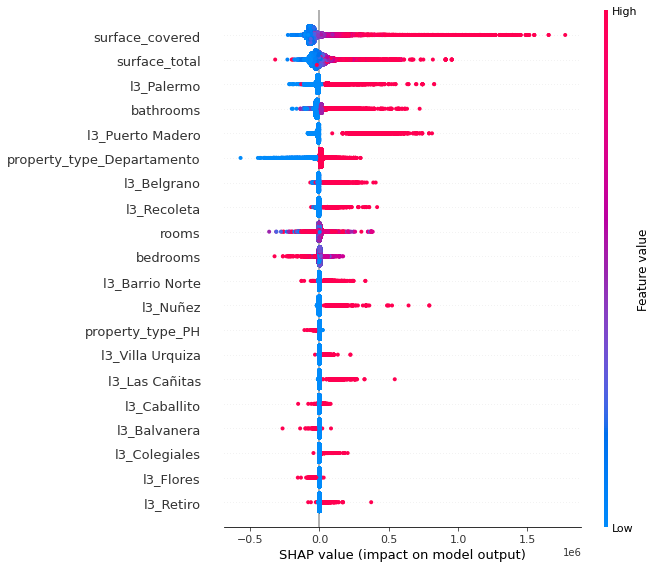

time: 11 s (started: 2021-08-11 08:03:48 -03:00)


In [44]:
shap.summary_plot(shap_values, X_train)

__Gráfica 8:__ mostrando el impacto (grado de contribución) de algunas de las variables independientes utilizadas para entrenar el modelo.
___
___

## __7.-Conclusiones__

__El proceso:__ se entrenó un modelo de aprendizaje automático utilizando el mismo algoritmo XGBoost utilizado en el SPRINT 02 y que obtuvo el mejor desempeño  (R2: 0.920) al aplicarse una ingenieria de features y seleccionando lo que se estimó en ese momento como "variables más relevantes". Adicionalmente, le fueron eliminados los outliers al dataset por considerarse muy "ruidosos" y que impactarían a lo que se estimaba podía ser un modelo de base con alta capacidad predictiva.

Sin embargo para el informe final se propuso realizar la prueba de desempeño del mismo algoritmo al ser entrenado usando la totalidad de las variables y sin eliminar los outliers como se menciona en el párrafo anterior.

Como resultado obtuvimos un rendimiento de R2: 0.03, apenas inferior al resultado obtenido de entrenar el mismo algoritmo con un tratamiento de datos más "agresivo" que no sería coherente con un entorno real.

__Explicabilidad de modelos de aprendizaje automático:__ ciertamente este informe supone un ejercicio de reporte a una línea gerencial para sustentar decisiones de índole corporativo, lo que hace necesaria la inclusión de un apartado que ayude a los no especialistas en datos para entender los criterios del modelo para sus resultados en base a las variables incluidas en el mismo. El análisis de la explicablidad de los modelos busca facilitar la comprensión para su mejora y evitar (o descubrir) "sesgos"; esto fortalece la confianza en los resultados de los modelos.

Cuando se utilizan modelos de aprendizaje automático para sustentar decisiones delicadas que pueden afectar de manera importante la vida de las personas como los casos de:

- Otorgar o negar un crédito a una persona
- Clasificación de tumores
- Probabilidad de desarrollo de enfermedades
- Probabilidad de fraude

, se requiere que el ente que toma las decisiones sea capaz de explicar cómo llegó a su conclusión, ya que en algunos caso podría ser una decisión que podría calificarse como "discriminatoria" si no se argumenta correctamente el método que condujo al analista a dicha conclusión.

Entre los beneficios de la “interpretabilidad de los modelos“ podemos contar:

- Mejorar la confiabilidad sobre los resultados.
- Ayudar a la ingeniería de features.
- Detectar las posibles necesidades de agregar nuevos registros.
- Soportar la toma de decisiones.
- Mayor seguridad/robustez/transparencia en el modelo obtenido.

Técnicas de explicación de modelos:

- Importancia de permutación
- Plots de dependencia parcial
- Valores SHAP


__Preguntas a responder:__

__1. ¿Cómo afectan los outliers eliminados en el SPRINT 02, al mismo modelo sin eliminar dichos valores atípicos?__

Se entrenó nuevamente el modelo basado en el algoritmo XGBoost sin haber eliminado el 7.37% (6072) de las muestras que mostraban valores atípicos de la variable objetivo precio. Tras el análisis y comprensión del origen y naturaleza de dichos outliers se decisión preservarlos por considerarlo valores genuinos de del set de datos y que si bien podían agregar ruido al modelo, representaban parte de las caraterísticas de alta variabilidad del set de datos. 

Recordemos que durante el SPRINT 02 tras el análisis de la gráfica de residuales, se detectó un aumento del error a medida que los valores de X aumentaban. Esta dispersión irregular en forma de "abanico" indicó que la varianza no es constante y por ende mostraba residuos agrupados en las cercanías a 0 para valores de X pequeños y que se dispersaban para valores de x grandes; indicando el  fenómeno de __heterocedasticidad__.

Mantener los outliers que se eliminaron en modelos entrenados anteriormente no impactó de manera significativa el performance del modelo, permitiendole mantener una capacidad de predicción del orden de R2: 0.900.

__2. ¿Cómo afecta la selección de features al performance del modelo?__

En este ejercicio se entrenó el modelo XGB empleando la totalidad de las 65 variables independientes creadas tras la ingeniería de features; nuevamente el impacto en el performance fue mínimo tanto en capacidad de predicción como en costo computacional.

__3. ¿Cómo se podría explicar el trabajo subyacente que hace el modelo para predecir el precio de una nueva publicación?__

Para analizar la contribución de cada variable empleada en los resultados de nuestro modelo, optamos por emplear el plot de valores SHAP. 

El acrónimo SHAP significa “Shapley Additive exPlanation” y se basa en la teoría de juegos para explicar cómo cada una de las variables que participan en un “juego colaborativo” contribuyen en el éxito de la partida. Ésta es la clave para comprender una predicción y como  cada feature impacta en los resultados. 

Si nos basamos en los resultados obtenidos de la aproximación SHAP ejecutada en el apartado "6", gráficas "7" y "8", podemos percibir como las variables cuantitativas originales ("surface_covered" y "surface_total") en primer lugar, tienen un peso importante en los resultados. Posteriormente hay una intercalación entre variables originales y variables procesadas que sugieren que la ubicación ("l3" o barrios) tiene una marcada influencia en la predicción de los precios de las propiedades.

En un escenario real de aplicación hipotética, un analista podría intuir a partir de esta combinación de variables que usa nuestro modelo, si una propiedad puede cotizarse a mayor o menor precio con solo saber: superficie (cubierta/total), ubicación (Palermo, Puerto Madero, Belgrano, recoleta) y el número de ambientes habitables (rooms). Esto en primera instancia antes de someter la nueva propiedad a publicar al modelo.

Una vez generada la estimación de precio de la propiedad en base al modelo, el analista podría ser capaz de explicar al propietario las carancterpisticas de su propiedad que le confieren dicho precio respecto a otras muchas propiedades similares.

___


## Bibliografía

- Alice Zheng, Amanda Casari. _Feature Engineering for Machine Learning_. O’Reilly Media, Inc. 2018. Pags. 77-83.
- Sadrach Pierre. _Mastering Model Explainability in Python - Interpreting Model Feature Importance_. Link: https://towardsdatascience.com/mastering-model-explainability-in-python-4e578206e000
- bprasad26 / statistics_with_python. Github: https://github.com/bprasad26/statistics_with_python?utm_campaign=News&utm_medium=Community&utm_source=DataCamp.com
- Vaishak Belle, Ioannis Papantonis. _Principles and Practice of Explainable Machine Learning_. Link: https://www.frontiersin.org/articles/10.3389/fdata.2021.688969/full
- Sunil Ray. _A Comprehensive Guide to Data Exploration_. Link: https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/



# ==============     Fin del notebook correspondiente al INFORME FINAL      =================
___
___